In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# I should change this to path format once we have similar file paths for the main

#Average rents for areas with a population of 10,000 and over path
file = r"E:\DataSci\Project 1\Datasets\Average rents for areas with a population of 10,000 and over\34100133.csv"
df = pd.read_csv(file)
df.head()

C:\Users\LinkO\AppData\Local\Temp\ipykernel_3720\4177964130.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,REF_DATE,GEO,DGUID,Type of structure,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v42135513,192.3.1,NaN,..,NaN,NaN,0
1,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,One bedroom units,Dollars,81,units,0,v42135529,192.3.2,NaN,..,NaN,NaN,0
2,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Two bedroom units,Dollars,81,units,0,v42135545,192.3.3,NaN,..,NaN,NaN,0
3,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Three bedroom units,Dollars,81,units,0,v42135561,192.3.4,NaN,..,NaN,NaN,0
4,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row structures of three units and over,Bachelor units,Dollars,81,units,0,v42135577,192.2.1,NaN,..,NaN,NaN,0


In [4]:
reduced_df = df.loc[:, ["REF_DATE", "GEO","Type of structure", "Type of unit", "STATUS", "VALUE"]]

reduced_df

,REF_DATE,GEO,Type of structure,Type of unit,STATUS,VALUE
0,1987,"Bay Roberts, Newfoundland and Labrador",Row and apartment structures of three units an...,Bachelor units,..,NaN
1,1987,"Bay Roberts, Newfoundland and Labrador",Row and apartment structures of three units an...,One bedroom units,..,NaN
2,1987,"Bay Roberts, Newfoundland and Labrador",Row and apartment structures of three units an...,Two bedroom units,..,NaN
3,1987,"Bay Roberts, Newfoundland and Labrador",Row and apartment structures of three units an...,Three bedroom units,..,NaN
4,1987,"Bay Roberts, Newfoundland and Labrador",Row structures of three units and over,Bachelor units,..,NaN
...,...,...,...,...,...,...
122355,2022,"Yellowknife, Northwest Territories",Apartment structures of three units and over,Three bedroom units,NaN,2133.0
122356,2022,"Yellowknife, Northwest Territories",Apartment structures of six units and over,Bachelor units,NaN,1279.0
122357,2022,"Yellowknife, Northwest Territories",Apartment structures of six units and over,One bedroom units,NaN,1563.0
122358,2022,"Yellowknife, Northwest Territories",Apartment structures of six units and over,Two bedroom units,NaN,1820.0


In [5]:
prime_df = reduced_df[(reduced_df['REF_DATE'] >= 1991) & (reduced_df['REF_DATE'] <= 2021)]

#In the code below I remove unreliable data reported in 'STATUS' and blanks in 'VALUE'
prime_df = prime_df.loc[prime_df['STATUS'] != 'F'].dropna(subset=['VALUE'])
prime_df

,REF_DATE,GEO,Type of structure,Type of unit,STATUS,VALUE
13648,1991,"Corner Brook, Newfoundland and Labrador",Apartment structures of six units and over,Bachelor units,NaN,357.0
13649,1991,"Corner Brook, Newfoundland and Labrador",Apartment structures of six units and over,One bedroom units,NaN,385.0
13650,1991,"Corner Brook, Newfoundland and Labrador",Apartment structures of six units and over,Two bedroom units,NaN,413.0
13651,1991,"Corner Brook, Newfoundland and Labrador",Apartment structures of six units and over,Three bedroom units,NaN,466.0
13665,1991,"Gander, Newfoundland and Labrador",Apartment structures of six units and over,One bedroom units,NaN,393.0
...,...,...,...,...,...,...
119027,2021,"Yellowknife, Northwest Territories",Apartment structures of three units and over,Three bedroom units,NaN,2095.0
119028,2021,"Yellowknife, Northwest Territories",Apartment structures of six units and over,Bachelor units,NaN,1234.0
119029,2021,"Yellowknife, Northwest Territories",Apartment structures of six units and over,One bedroom units,NaN,1555.0
119030,2021,"Yellowknife, Northwest Territories",Apartment structures of six units and over,Two bedroom units,NaN,1801.0


<IPython.core.display.Javascript object>


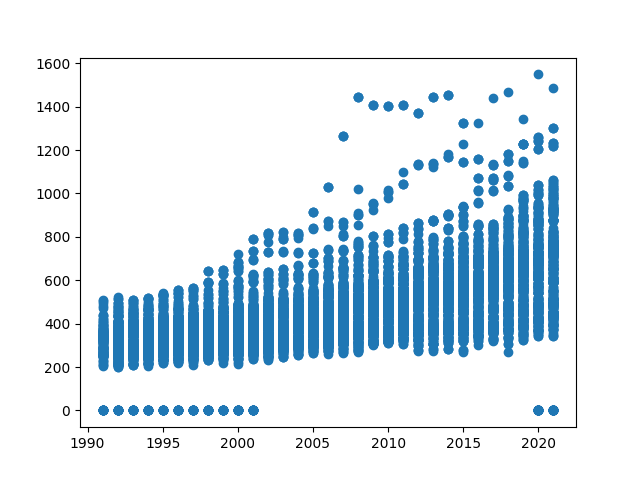

NameError: name 'samples' is not defined

In [9]:
bachelor_df = prime_df[prime_df["Type of unit"] == "Bachelor units"]

# samples = [bachelor_df.sample(div) for x in range(0,nsamples)]

#im changing this into a mean graph instead, scatterplot is unclear


plt.scatter(bachelor_df["REF_DATE"], bachelor_df["VALUE"])

# bach_means = [y['MEDV'].mean() for y in samples]

plt.xlabel("Year")
plt.ylabel('Bachelor units')
plt.show()


<IPython.core.display.Javascript object>


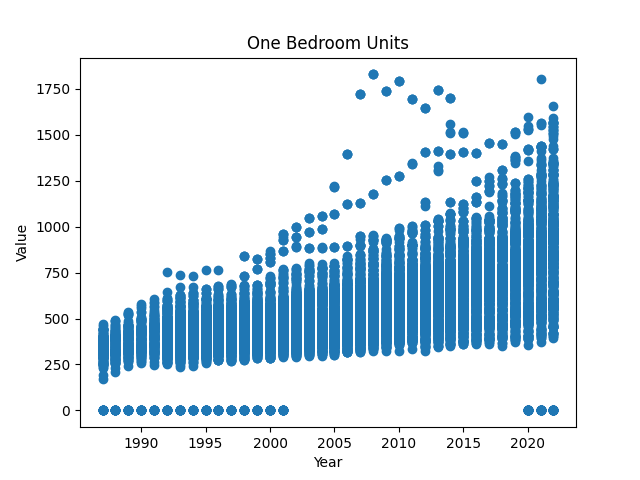

In [12]:
one_bedroom_df = df[df['Type of unit'] == 'One bedroom units']

plt.scatter(one_bedroom_df['REF_DATE'], one_bedroom_df['VALUE'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('One Bedroom Units')
plt.show()

<IPython.core.display.Javascript object>


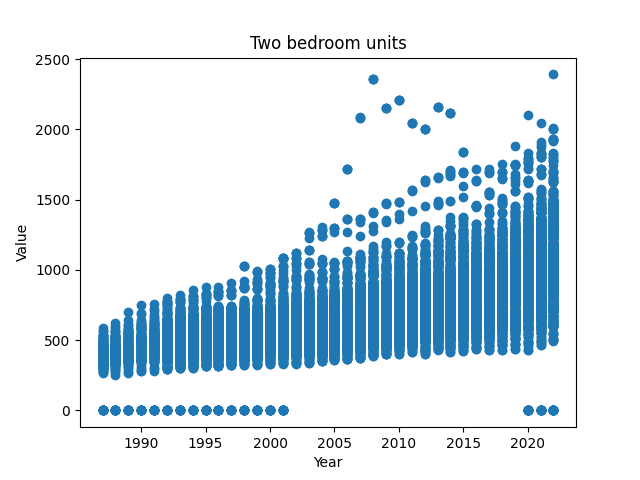

In [13]:
two_bedroom_df = df[df['Type of unit'] == 'Two bedroom units']

plt.scatter(two_bedroom_df['REF_DATE'], two_bedroom_df['VALUE'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Two bedroom units')
plt.show()

<IPython.core.display.Javascript object>


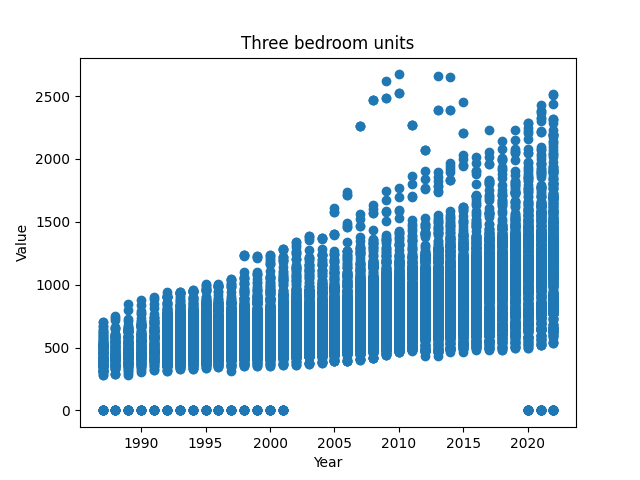

In [14]:
three_bedroom_df = df[df['Type of unit'] == 'Three bedroom units']

plt.scatter(three_bedroom_df['REF_DATE'], three_bedroom_df['VALUE'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Three bedroom units')
plt.show()

In [15]:
#time for census work 
file = r"E:\DataSci\Project 1\Datasets\Distribution of total income by census family type and age of older partner, parent or individual\11100239.csv"
census_df = pd.read_csv(file)
census_df.head()

,REF_DATE,GEO,DGUID,Age group,Sex,Income source,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Number of persons,Number,223,thousands,3,v107660854,1.1.1.1.1,16797.0,NaN,NaN,NaN,0
1,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Number with income,Number,223,thousands,3,v107660855,1.1.1.1.2,14167.0,NaN,NaN,NaN,0
2,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Aggregate income,2020 constant dollars,425,millions,6,v107660856,1.1.1.1.3,582340.0,NaN,NaN,NaN,0
3,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Average income (excluding zeros),2020 constant dollars,425,units,0,v107660857,1.1.1.1.4,41100.0,NaN,NaN,NaN,0
4,1976,Canada,2016A000011124,16 years and over,Both sexes,Total income,Median income (excluding zeros),2020 constant dollars,425,units,0,v107660858,1.1.1.1.5,32000.0,NaN,NaN,NaN,0


In [20]:
reduced_census = census_df.loc[:, ['REF_DATE', 'GEO', 'Age group', 'Sex', 'Income source', 'Statistics', 'SCALAR_FACTOR', 'VALUE', 'STATUS']]  

relevant_census =  reduced_census[(reduced_census['REF_DATE'] >= 1991) &
                                  (reduced_census['REF_DATE'] <= 2021)]

relevant_census = relevant_census.loc[relevant_census['STATUS'] != 'F'].dropna(subset=['VALUE'])

scaling_factors = {'units': 1, 'thousands': 1000, 'millions': 1000000}
relevant_census['SCALED_VALUE'] = relevant_census.apply(lambda x: x['VALUE'] * scaling_factors[x['SCALAR_FACTOR']], axis=1)


relevant_census.head()


,REF_DATE,GEO,Age group,Sex,Income source,Statistics,SCALAR_FACTOR,VALUE,STATUS,SCALED_VALUE
567000,1991,Canada,16 years and over,Both sexes,Total income,Number of persons,thousands,21318.0,NaN,2.131800e+07
567001,1991,Canada,16 years and over,Both sexes,Total income,Number with income,thousands,19756.0,NaN,1.975600e+07
567002,1991,Canada,16 years and over,Both sexes,Total income,Aggregate income,millions,779551.0,NaN,7.795510e+11
567003,1991,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,39500.0,NaN,3.950000e+04
567004,1991,Canada,16 years and over,Both sexes,Total income,Median income (excluding zeros),units,30100.0,NaN,3.010000e+04


In [28]:
income_cen = relevant_census[relevant_census["Statistics"] == "Average income (excluding zeros)"]

income_cen = income_cen[(income_cen['Age group'] == "16 years and over") &
                        (income_cen['GEO'] == 'Canada') &
                        (income_cen['Income source'] == 'Total income') &
                        (income_cen['Sex'] == 'Both sexes')]
                
#bachelor_df = prime_df[prime_df["Type of unit"] == "Bachelor units"]

income_cen.head(30)

,REF_DATE,GEO,Age group,Sex,Income source,Statistics,SCALAR_FACTOR,VALUE,STATUS,SCALED_VALUE
567003,1991,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,39500.0,NaN,39500.0
604803,1992,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,39500.0,NaN,39500.0
642603,1993,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,38200.0,A,38200.0
680403,1994,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,38600.0,A,38600.0
718203,1995,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,38700.0,A,38700.0
756003,1996,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,38500.0,A,38500.0
793803,1997,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,38600.0,A,38600.0
831603,1998,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,39900.0,A,39900.0
869403,1999,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,41000.0,A,41000.0
907203,2000,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,42000.0,A,42000.0


<IPython.core.display.Javascript object>


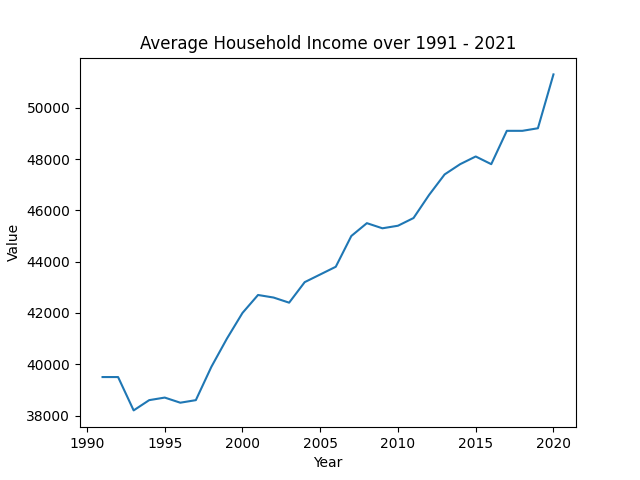

In [29]:
#basic attempt at visuals 

plt.plot(income_cen["REF_DATE"], income_cen["VALUE"])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Household Income over 1991 - 2021')
plt.show()
